# PROJECT: EXPLORATORY DATA ANALYSIS ON [_SAMPLESuperstore_](https://bit.ly/3i4rbWl) data
## TASK:
 * Find out weak areas where more profit can be made
 * Creating visualization and story about the data set
# AUTHOR: OGUNJINMI ISAAC AYOBAMI

In [1]:
# importing of libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
# loading the samplessuperstore from my local drive
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# inspecting the data type and the presence of missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


>The data contains 9994 data entries with 13 columns, the data contains no null values and the data includes object(string), float64(decimal) and int64

In [4]:
# Descriptive analysis on the quantitative data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [5]:
# Descriptive analysis on the qualitative
df.describe(include=np.object).T

,count,unique,top,freq
Ship Mode,9994,4,Standard Class,5968
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Region,9994,4,West,3203
Category,9994,3,Office Supplies,6026
Sub-Category,9994,17,Binders,1523


In [6]:
# The number of state in each region
df.groupby('Region')['State'].unique().to_frame().applymap(lambda x: len(x))

,State
Region,
Central,13
East,14
South,11
West,11


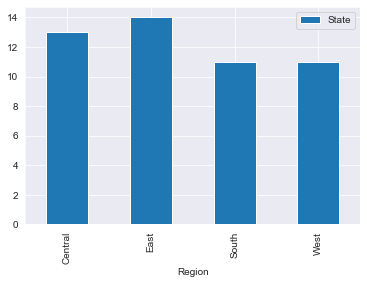

In [7]:
# visualizing the number of state in each region
df.groupby('Region')['State'].unique().to_frame().applymap(lambda x: len(x)).plot.bar();

In [8]:
# total state counts under each region
df.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

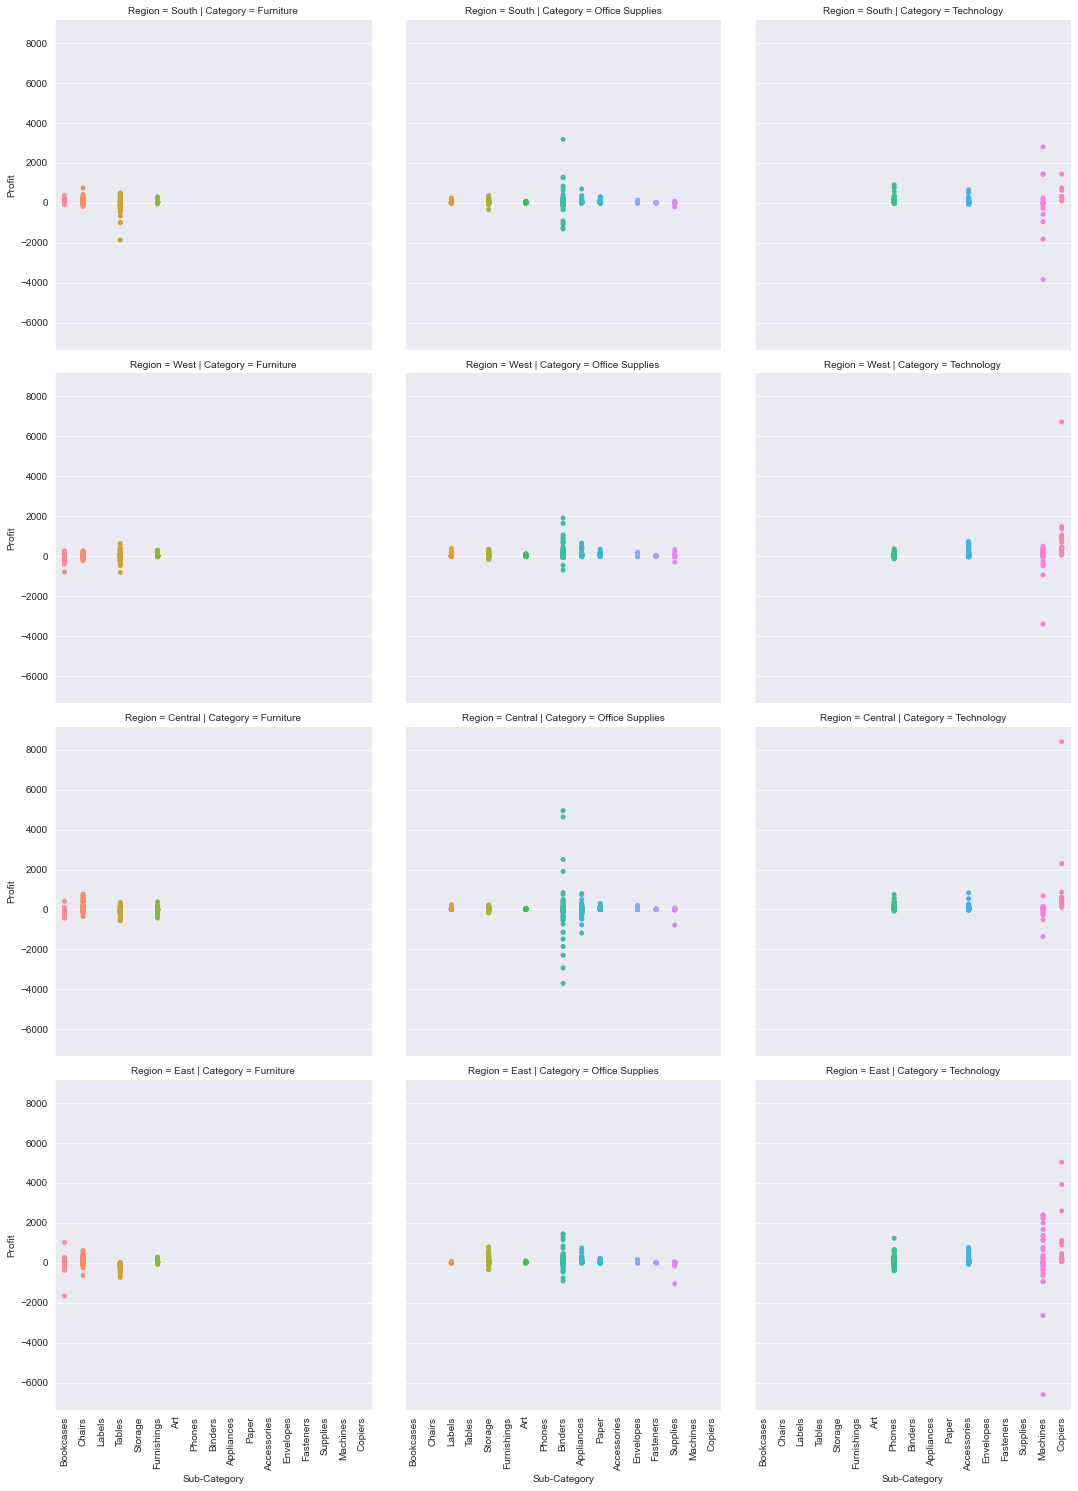

In [9]:
g = sns.catplot(data = df, x = 'Sub-Category', y = 'Profit', row='Region', col= 'Category', jitter=False);
g.set_xticklabels(rotation = 90);

> In the graphy above we visualize regions where profits increases or decreases base on Sub-Category and Category. Region where there are positive increment in profit indicates the likehood of areas to invest

In [10]:
gr = df.groupby(['Sub-Category', 'Category'])['Sales', 'Profit'].sum()
gr = gr.reset_index()
gr['Sales'] = gr['Sales']/df.Sales.sum()
gr['Profit'] = gr['Profit']/df.Profit.sum()
gr.head()

,Sub-Category,Category,Sales,Profit
0,Accessories,Technology,0.072863,0.146428
1,Appliances,Office Supplies,0.046810,0.063332
2,Art,Office Supplies,0.011805,0.022793
3,Binders,Office Supplies,0.088548,0.105524
4,Bookcases,Furniture,0.050009,-0.012125


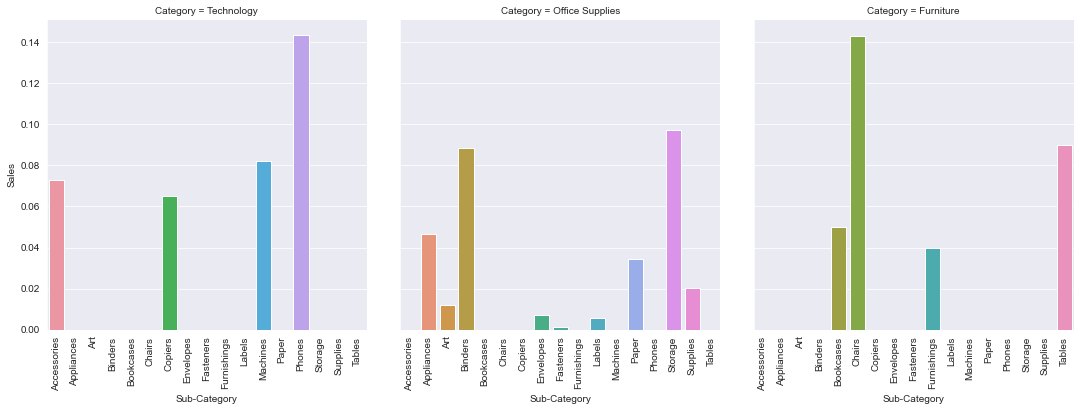

In [11]:
g = sns.catplot(x = 'Sub-Category', y= 'Sales', data = gr, kind = 'bar', col = 'Category')
g.set_xticklabels(rotation = 90);

> Sales is one of the best way to determine which material to invest on. For instance in the category _Technology_ has more sales on _Phone_ etc.

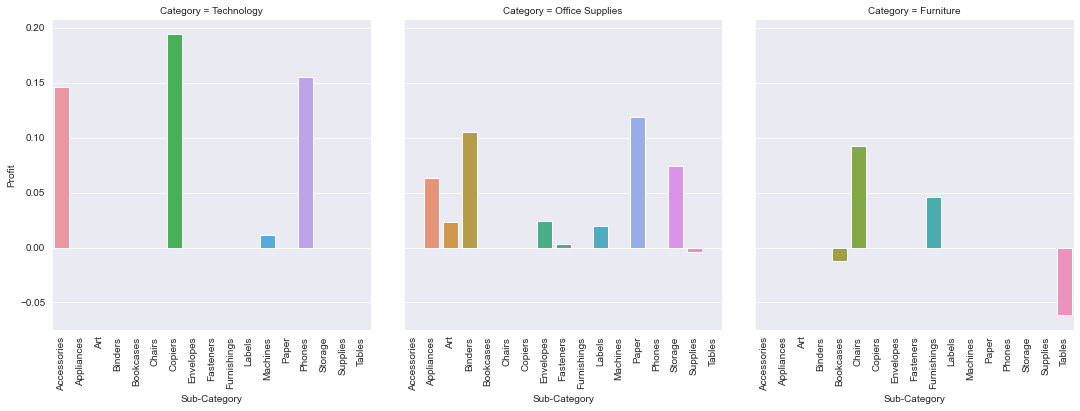

In [12]:
g = sns.catplot(x = 'Sub-Category', y= 'Profit', data = gr, kind = 'bar', col = 'Category')
g.set_xticklabels(rotation = 90);

> looking at the graph above raise in profit of sub-category across the category can also help determine which items to invest in across each category

In [13]:
fr = df.groupby(['Sub-Category', 'Category', 'Region'])['Sales', 'Profit'].sum()
fr = fr.reset_index()
fr['Sales'] = fr['Sales']/df.Sales.sum()
fr['Profit'] = fr['Profit']/df.Profit.sum()
fr.head()

,Sub-Category,Category,Region,Sales,Profit
0,Accessories,Technology,Central,0.014782,0.025320
1,Accessories,Technology,East,0.019604,0.039092
2,Accessories,Technology,South,0.011874,0.024457
3,Accessories,Technology,West,0.026604,0.057559
4,Appliances,Office Supplies,Central,0.010266,-0.009213


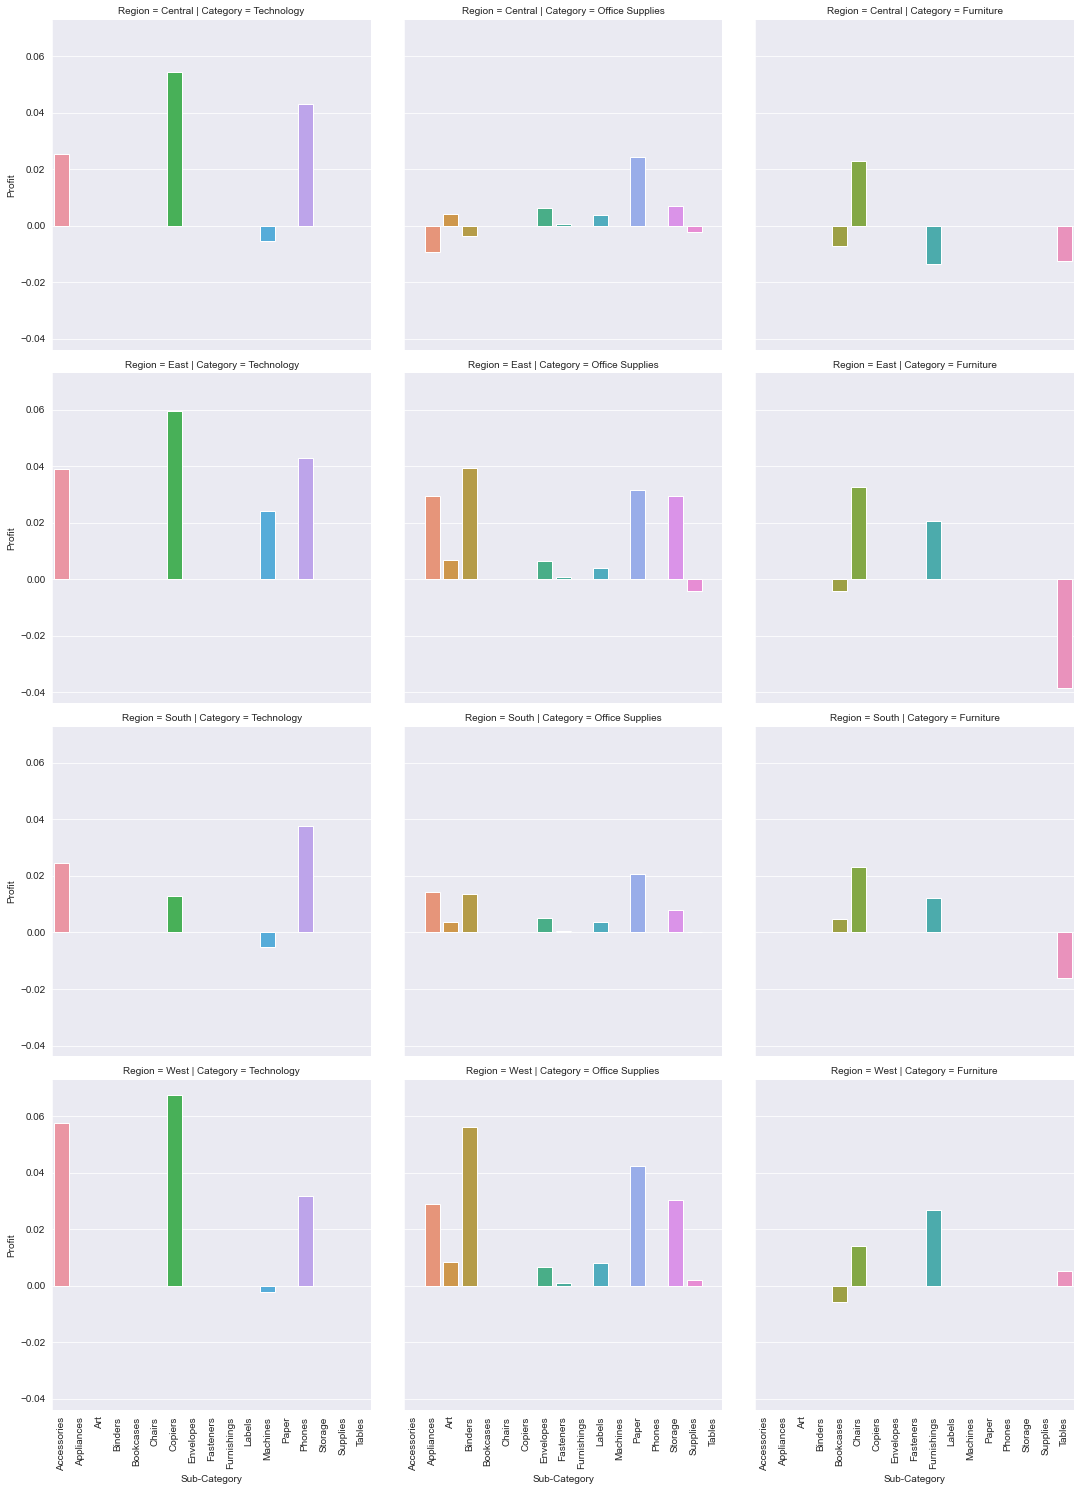

In [14]:
g = sns.catplot(data=fr, x='Sub-Category', y = 'Profit',  kind = 'bar', col = 'Category', row='Region', ci = False)
g.set_xticklabels(rotation = 90);

In [15]:
dr = df.groupby(['Sub-Category', 'Category', 'State'])['Sales', 'Profit'].sum()
dr = dr.reset_index()
dr['Sales'] = dr['Sales']/df.Sales.sum()
dr['Profit'] = dr['Profit']/df.Profit.sum()
dr.head()

,Sub-Category,Category,State,Sales,Profit
0,Accessories,Technology,Alabama,0.001011,0.002851
1,Accessories,Technology,Arizona,0.001478,0.000785
2,Accessories,Technology,Arkansas,0.000779,0.002387
3,Accessories,Technology,California,0.016218,0.038742
4,Accessories,Technology,Colorado,0.000996,0.000784


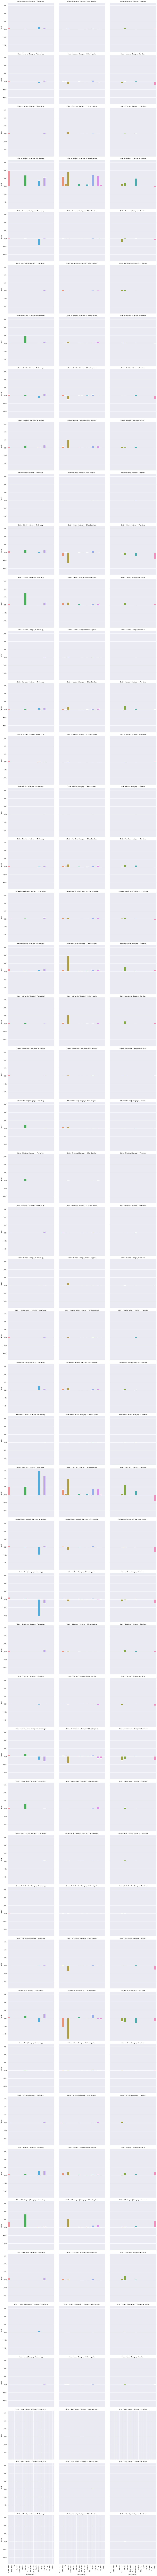

In [16]:
g = sns.catplot(data=dr, x='Sub-Category', y = 'Profit',  kind = 'bar', col = 'Category', row='State', ci = False)
g.set_xticklabels(rotation = 90);

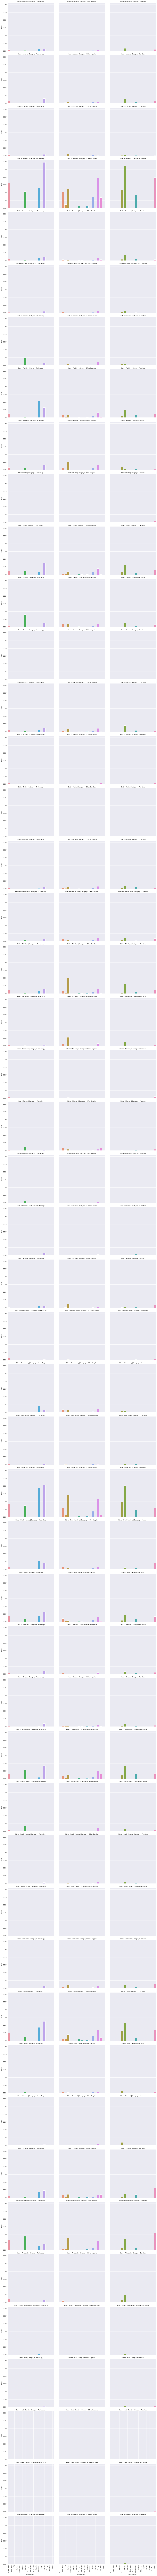

In [17]:
g = sns.catplot(data=dr, x='Sub-Category', y = 'Sales',  kind = 'bar', col = 'Category', row='State', ci = False)
g.set_xticklabels(rotation = 90);

> visualizing the sale and profit aross state and region is a greet way to determine which region and state to invest put one particular category in mind

'\na plot of sales against profit investigating the effect of discount, despite the increase in discount\nit does not translate to increase in profit judge from discount in this case could be possible to retain \nexisting customers or to win newer customers\n'

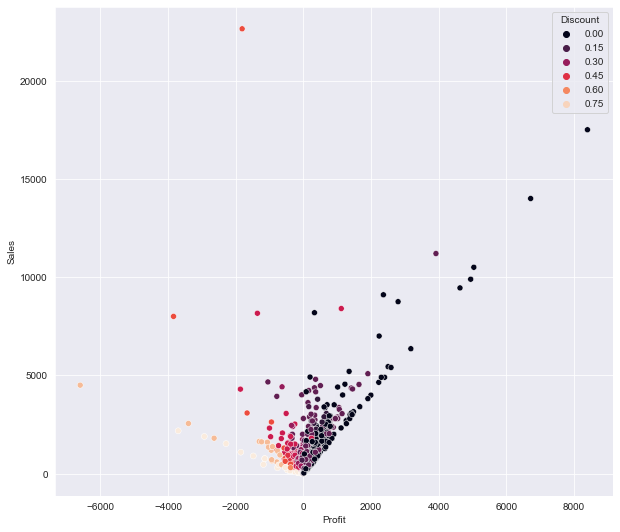

In [18]:
plt.figure(figsize=(10, 9))
sns.scatterplot(data=df, x ='Profit', y ='Sales', hue = 'Discount', palette='rocket');
plt.grid(b = True)
"""
a plot of sales against profit investigating the effect of discount, despite the increase in discount
it does not translate to increase in profit judge from discount in this case could be possible to retain 
existing customers or to win newer customers
"""

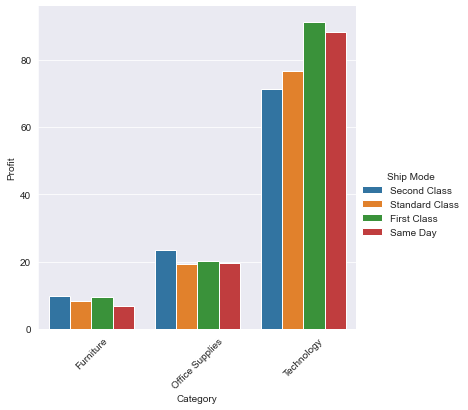

In [19]:
g = sns.catplot(data = df, x = 'Category', y = 'Profit', hue = 'Ship Mode', kind = 'bar', ci = None);
g.set_xticklabels(rotation = 45);

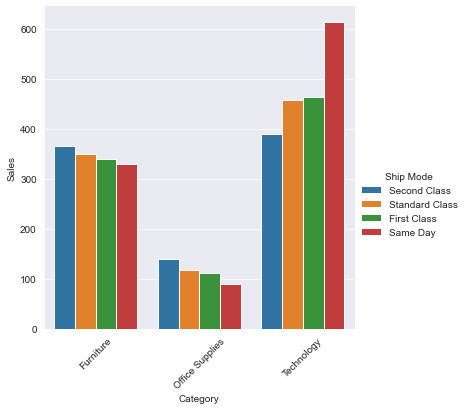

In [20]:
g = sns.catplot(data = df, x = 'Category', y = 'Sales', hue = 'Ship Mode', kind = 'bar', ci = None);
g.set_xticklabels(rotation = 45);

In [21]:
df1 = df.copy()
df1.Sales = df1['Sales'].apply(np.log)
df1.Profit = df1['Profit'].apply(np.log)

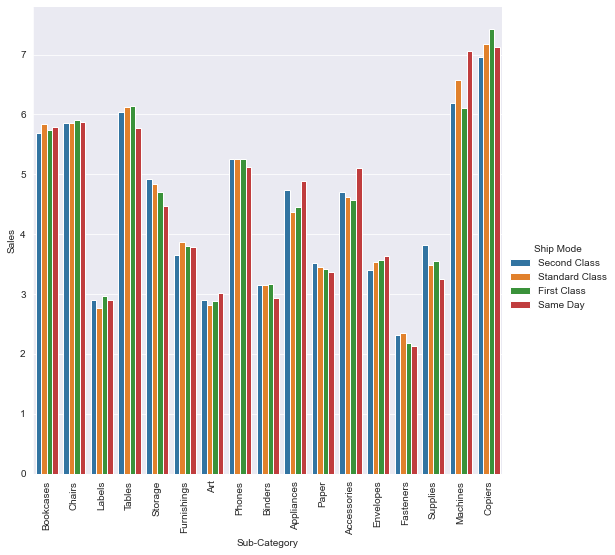

In [22]:
g = sns.catplot(data = df1, x = 'Sub-Category', y = 'Sales', hue = 'Ship Mode', kind = 'bar', ci = None, height=7);
g.set_xticklabels(rotation = 90);

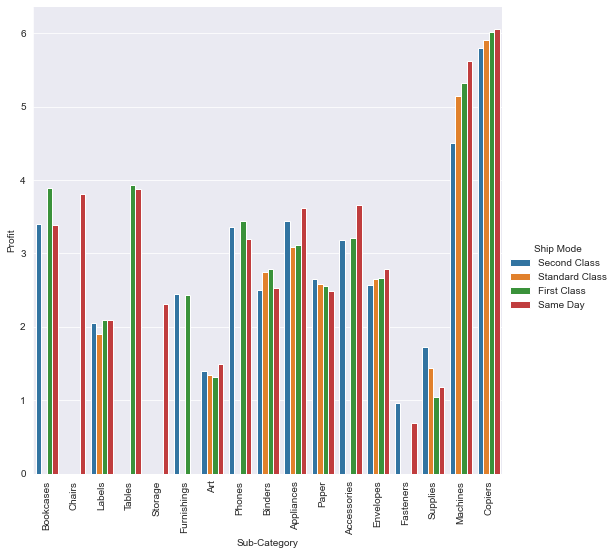

In [23]:
g = sns.catplot(data = df1, x = 'Sub-Category', y = 'Profit', hue = 'Ship Mode', kind = 'bar', ci = None, height=7);
g.set_xticklabels(rotation = 90);

> Effect of ship mode on sales and profit base on category and sub-category

In [24]:
# Number unique sub-category in each category
uni = {x:len(df[df['Category']==x]['Sub-Category'].unique()) for x in df['Category'].unique()}
print(uni)

{'Furniture': 4, 'Office Supplies': 9, 'Technology': 4}


In [25]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [26]:
drr = df.groupby(['Sub-Category', 'Category', 'Segment'])['Sales', 'Profit', 'Quantity'].sum()
drr = drr.reset_index()
drr['Sales'] = drr['Sales']/df.Sales.sum()
drr['Profit'] = drr['Profit']/df.Profit.sum()
drr.head()

,Sub-Category,Category,Segment,Sales,Profit,Quantity
0,Accessories,Technology,Consumer,0.037918,0.072403,1578
1,Accessories,Technology,Corporate,0.020978,0.044370,881
2,Accessories,Technology,Home Office,0.013967,0.029655,517
3,Appliances,Office Supplies,Consumer,0.022993,0.024378,908
4,Appliances,Office Supplies,Corporate,0.015928,0.025943,569


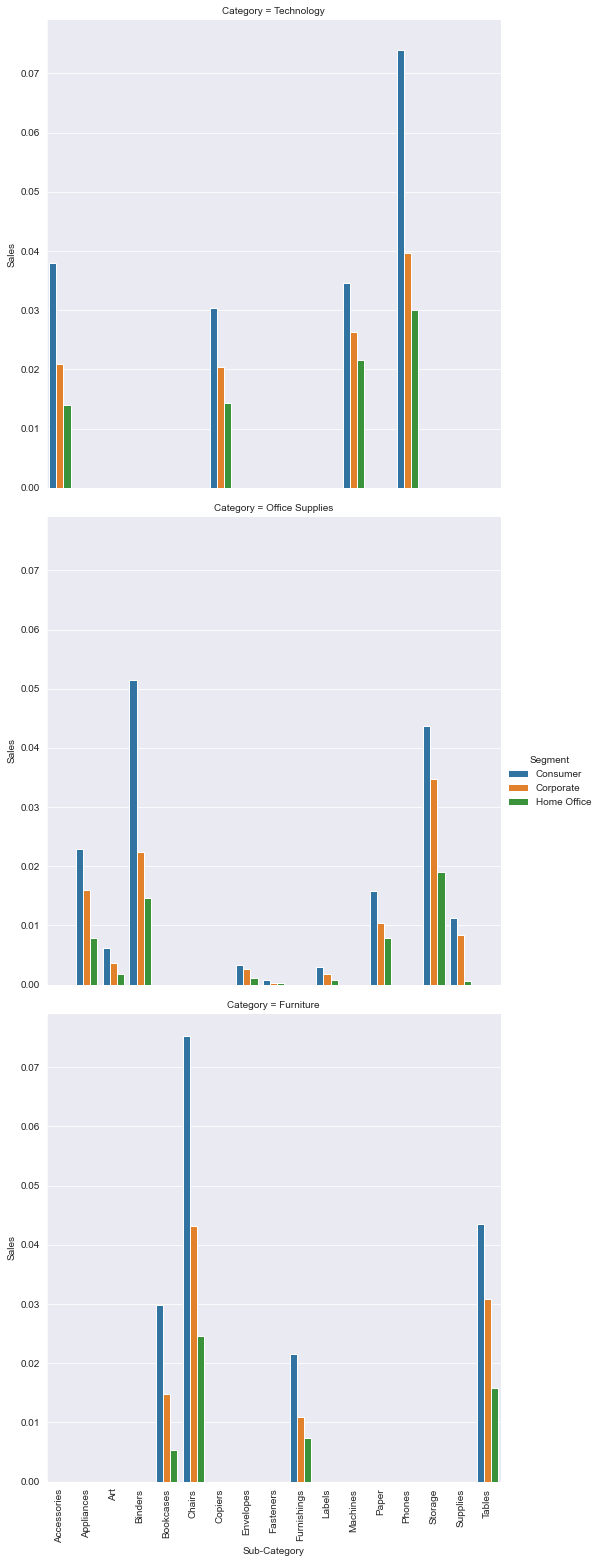

In [27]:
g = sns.catplot(data = drr, x = 'Sub-Category', y = 'Sales', hue = 'Segment', row = 'Category', kind = 'bar', ci = None, height=7);
g.set_xticklabels(rotation = 90);

> Effect of sales of items base on segment

In [28]:
count = df.Segment.value_counts().to_frame()/len(df)
count.reset_index(inplace = True)
count

,index,Segment
0,Consumer,0.519412
1,Corporate,0.302181
2,Home Office,0.178407


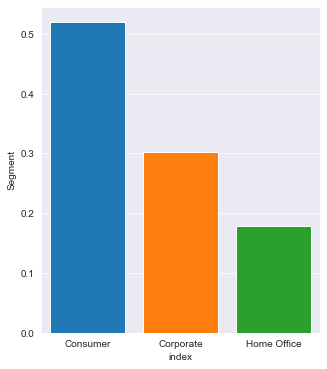

In [29]:
fig, ax = plt.subplots(figsize = (5,6))
sns.barplot(data= count, x = 'index', y = 'Segment', ax = ax, saturation=1);

In [30]:
prod_city = df.groupby('City')['Profit', 'Sales'].sum()
prod_city.reset_index(inplace = True)
prod_city[['Profit', 'Sales']] = prod_city[['Profit', 'Sales']].apply(np.log)
prod_city.fillna(0, inplace = True)
prod_city.sort_values('Sales', ascending= False).tail()

,City,Profit,Sales
354,Ormond Beach,0.000000,1.032472
370,Pensacola,0.000000,0.794801
221,Jupiter,-1.865621,0.724646
140,Elyria,0.000000,0.601032
1,Abilene,0.000000,0.330742


In [31]:
prod_city.sort_values('Profit', ascending= False).tail()

,City,Profit,Sales
287,Medina,0.000000,7.815095
289,Memphis,0.000000,8.689858
290,Mentor,0.000000,6.541218
530,Yuma,0.000000,6.734431
221,Jupiter,-1.865621,0.724646


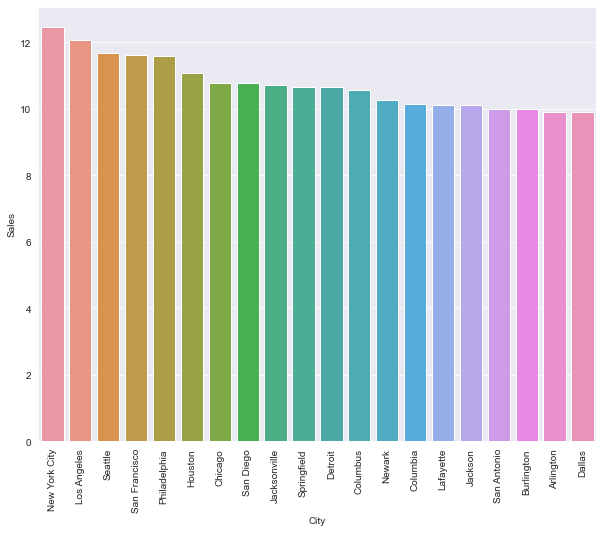

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(data = prod_city.sort_values('Sales', ascending= False).iloc[:20,:], x = 'City', y = 'Sales')
plt.xticks(rotation = 90);

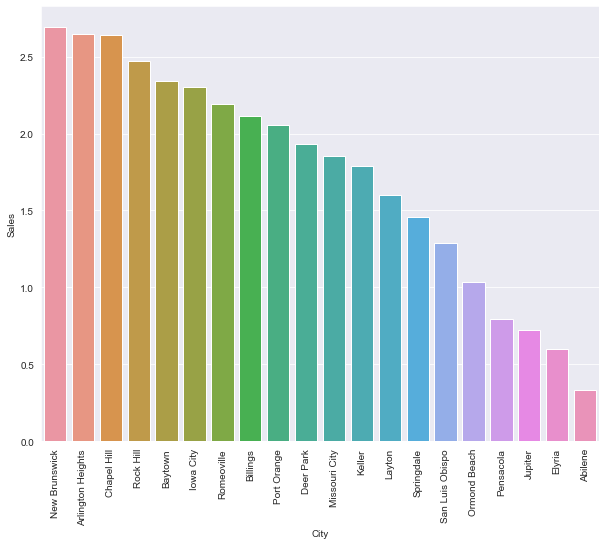

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(data = prod_city.sort_values('Sales', ascending= False).iloc[511:,:], x = 'City', y = 'Sales')
plt.xticks(rotation = 90);

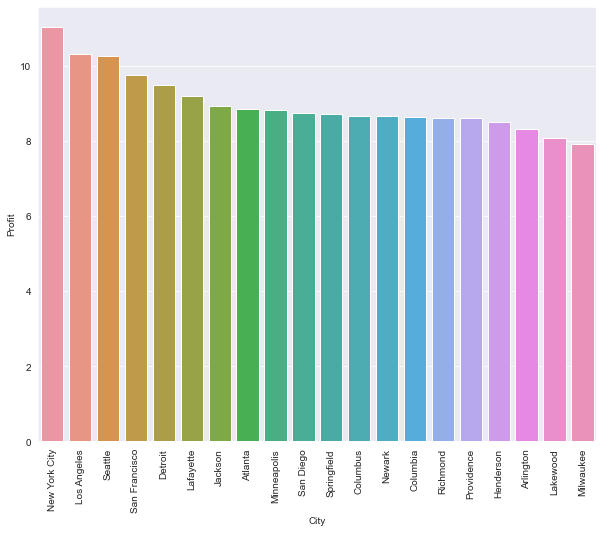

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(data = prod_city.sort_values('Profit', ascending= False).iloc[:20,:], x = 'City', y = 'Profit')
plt.xticks(rotation = 90);

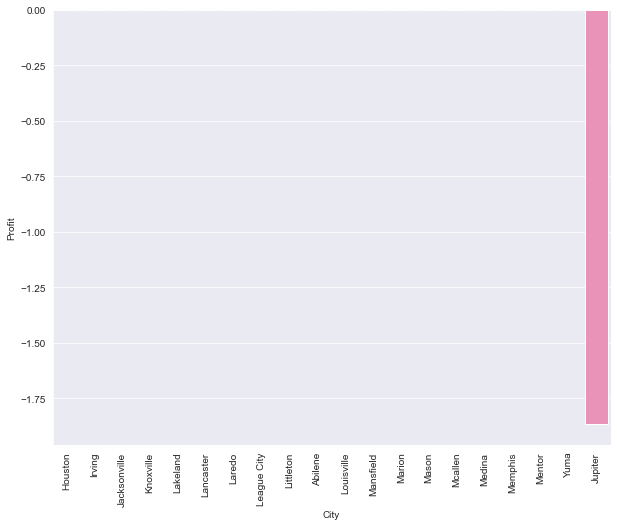

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(data = prod_city.sort_values('Profit', ascending= False).iloc[511:,:], x = 'City', y = 'Profit')
plt.xticks(rotation = 90);

> Effect of profit and sales across different state, the graph shows that first twenty state where to invest and the last 20 state where profit on invest is low
# THANK YOU